# Supervised Machine Learning Final Project

## Project Objective

The goal of this project is to build and compare classification models to predict the food category based on the nutritional information of various food items. This analysis is aimed at providing insights into which nutrients are most indicative of food categories, which may assist in nutrition labeling, dietary planning, or food recommendation systems.

This project emphasizes both **predictive accuracy** and **interpretability**, culminating in actionable insights communicated to stakeholders.


In [2]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Set seed
rs = 123

## Dataset Description

The dataset used in this project contains various food items along with their nutritional attributes such as calories, protein, fat, sugar, fiber, and more.

We will explore, clean, and prepare this data for training classification models.


In [4]:
# 2. Load Data (Update the path accordingly)
df = pd.read_csv(r"C:\Users\rizqi\OneDrive\Documents\Studi Independen\PPDKM Coursera\Komunikasi dan Kerjasama Tim\Supervised Machine Learning - Classification\Module 6\[3] Review\[2] Graded Assignment (Course Final Project)\Fixed\food_items.csv")
df.head(n=10)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
6,142.0,0,0.0,0.0,0.0,0.0,0,12.0,10.6,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
7,102.0,0,0.0,0.0,0.0,0.0,0,13.0,5.0,0.0,0.0,0,0.7,0,0,0,0,'In Moderation'
8,145.0,0,0.0,0.0,0.0,0.0,0,17.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
9,171.0,0,0.0,0.0,0.0,0.0,0,8.0,13.7,0.0,0.0,0,2.5,0,0,0,0,'In Moderation'


### Feature Correlation Heatmap

In this section, we explore the correlation between the nutritional attributes using a heatmap. This visualization helps identify which nutrients are strongly related, potentially leading to multicollinearity. Highly correlated features may affect the interpretability and performance of certain models like logistic regression.

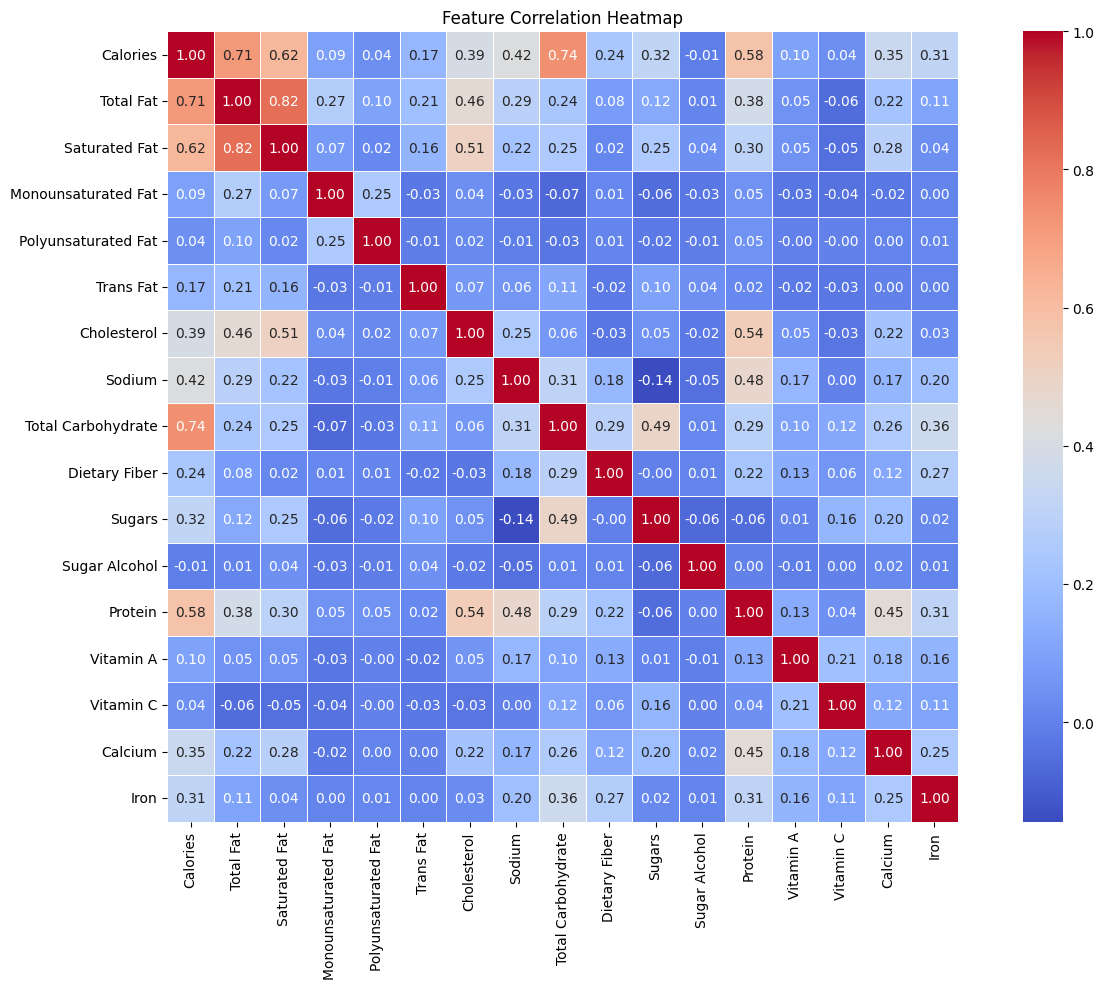

In [52]:
# Compute correlation matrix
corr_matrix = df.drop('class', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


## Data Cleaning and Feature Engineering

- Handled missing values and dropped irrelevant columns
- Converted categorical variables into numerical form (if any)
- Normalized or scaled features if necessary
- Selected relevant features for modeling

This step ensures that our data is clean, structured, and suitable for training machine learning models.


In [41]:
# 3. Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns[:-1]] = imputer.fit_transform(df[df.columns[:-1]])

In [42]:
# Encode target labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  # e.g., Less Often → 0, In Moderation → 1, More Often → 2


In [43]:
# Feature scaling
X = df.drop('class', axis=1)
y = df['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Training and Comparison

In this section, we train and evaluate multiple classifier models using the same train-test split:

- Logistic Regression (baseline)
- Support Machine Learning (SVM)
- Random Forest Classifier (ensemble model)

Each model is evaluated based on accuracy, precision, recall, and F1-score. This comparison helps us choose the most suitable model in terms of predictive power and interpretability.


In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=rs)

In [45]:
# 4. Logistic Regression (Multinomial)
def build_logistic_regression(X_train, y_train, X_test):
    model = LogisticRegression(
        random_state=rs,
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred, model

# 5. SVM

def build_svm(X_train, y_train, X_test):
    model = SVC(random_state=rs, kernel='rbf', decision_function_shape='ovr')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred, model

# 6. Random Forest

def build_random_forest(X_train, y_train, X_test):
    model = RandomForestClassifier(random_state=rs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred, model

In [46]:
# 7. Grid Search Functions
def grid_search_logistic(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    }
    model = LogisticRegression(
        random_state=rs,
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs'
    )
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', verbose=1)
    grid.fit(X_train, y_train)
    return grid.best_params_, grid.best_estimator_

def grid_search_svm(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    model = SVC(random_state=rs, decision_function_shape='ovr')
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', verbose=1)
    grid.fit(X_train, y_train)
    return grid.best_params_, grid.best_estimator_

def grid_search_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'class_weight': [None, 'balanced']
    }
    model = RandomForestClassifier(random_state=rs)
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', verbose=1)
    grid.fit(X_train, y_train)
    return grid.best_params_, grid.best_estimator_

In [47]:
# 7. Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Classification Report")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\rizqi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\rizqi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\rizqi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\rizqi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_mo


Logistic Regression (Tuned) Classification Report
                 precision    recall  f1-score   support

'In Moderation'       0.80      0.86      0.82      1330
   'Less Often'       0.84      0.75      0.79      1124
   'More Often'       0.83      0.90      0.86       198

       accuracy                           0.81      2652
      macro avg       0.82      0.84      0.83      2652
   weighted avg       0.82      0.81      0.81      2652



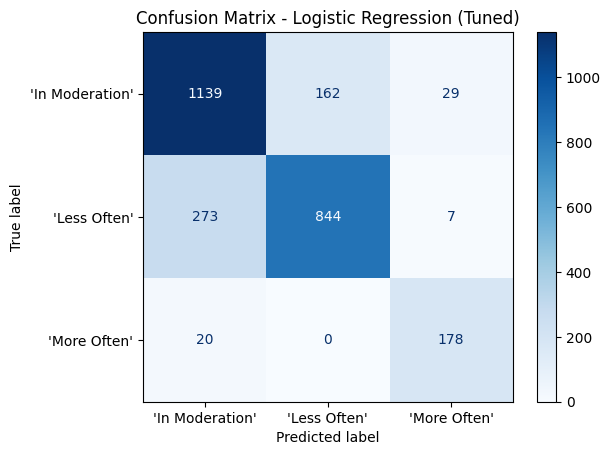

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Support Vector Machine (Tuned) Classification Report
                 precision    recall  f1-score   support

'In Moderation'       0.89      0.91      0.90      1330
   'Less Often'       0.92      0.87      0.90      1124
   'More Often'       0.82      0.91      0.86       198

       accuracy                           0.90      2652
      macro avg       0.88      0.90      0.89      2652
   weighted avg       0.90      0.90      0.90      2652



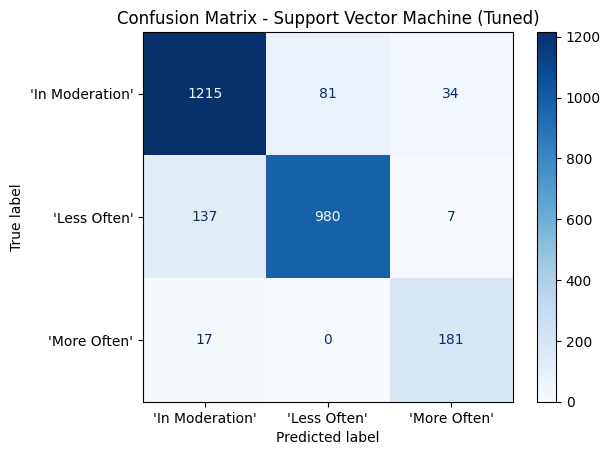

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Random Forest (Tuned) Classification Report
                 precision    recall  f1-score   support

'In Moderation'       0.94      0.95      0.95      1330
   'Less Often'       0.95      0.94      0.94      1124
   'More Often'       0.93      0.94      0.94       198

       accuracy                           0.94      2652
      macro avg       0.94      0.94      0.94      2652
   weighted avg       0.94      0.94      0.94      2652



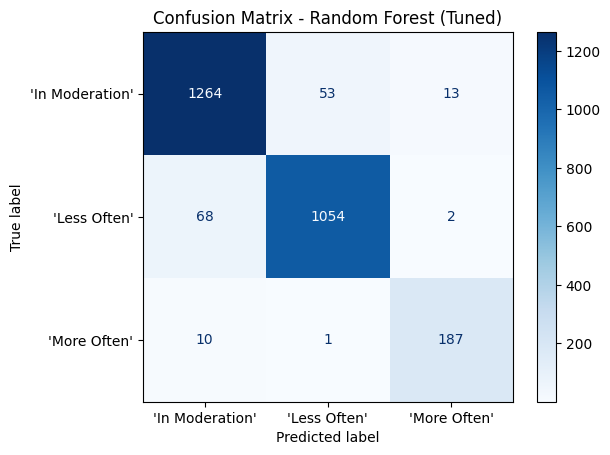

In [50]:
# 8. Run and Evaluate Both Models
# Logistic Regression with Grid Search
log_best_params, log_model = grid_search_logistic(X_train, y_train)
log_pred = log_model.predict(X_test)
evaluate_model(y_test, log_pred, "Logistic Regression (Tuned)")

# SVM with Grid Search
svm_best_params, svm_model = grid_search_svm(X_train, y_train)
svm_pred = svm_model.predict(X_test)
evaluate_model(y_test, svm_pred, "Support Vector Machine (Tuned)")

# Random Forest with Grid Search
rf_best_params, rf_model = grid_search_rf(X_train, y_train)
rf_pred = rf_model.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest (Tuned)")

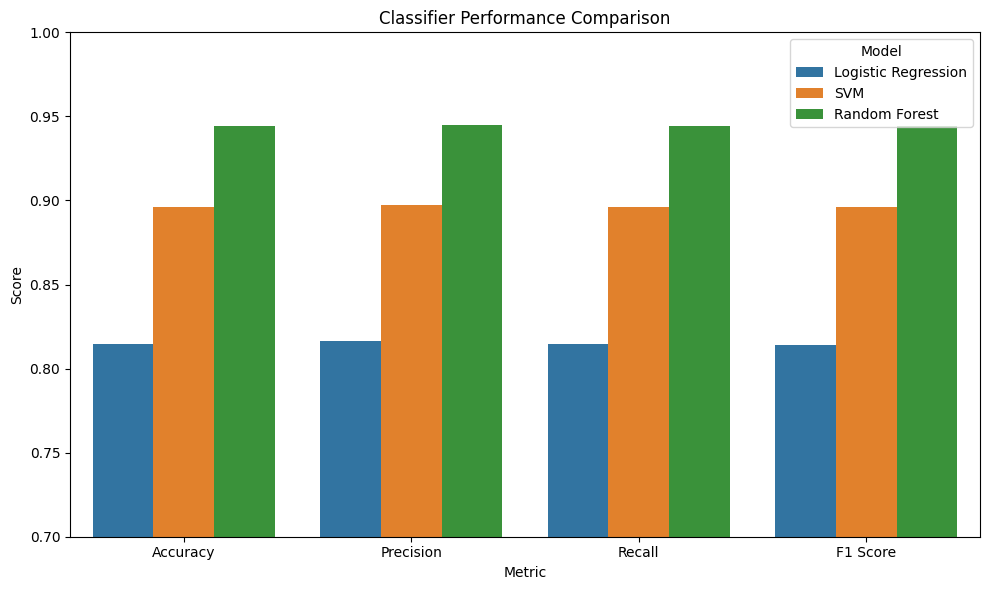

In [ ]:
# 9. Performance Comparison
# Calculate performance metrics
performance = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, rf_pred)
    ],
    'Precision': [
        precision_score(y_test, log_pred, average='weighted'),
        precision_score(y_test, svm_pred, average='weighted'),
        precision_score(y_test, rf_pred, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, log_pred, average='weighted'),
        recall_score(y_test, svm_pred, average='weighted'),
        recall_score(y_test, rf_pred, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, log_pred, average='weighted'),
        f1_score(y_test, svm_pred, average='weighted'),
        f1_score(y_test, rf_pred, average='weighted')
    ]
}

# Convert to DataFrame
perf_df = pd.DataFrame(performance)

# Melt DataFrame for seaborn
perf_df_melted = perf_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=perf_df_melted, x='Metric', y='Score', hue='Model')
plt.title('Classifier Performance Comparison')
plt.ylim(0.7, 1.0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


## Feature Importance from Random Forest

Below is the feature importance plot derived from the trained Random Forest model. It shows which nutritional attributes are most influential in classifying food items.

This provides valuable insights for stakeholders regarding the role of nutrients in determining food types.


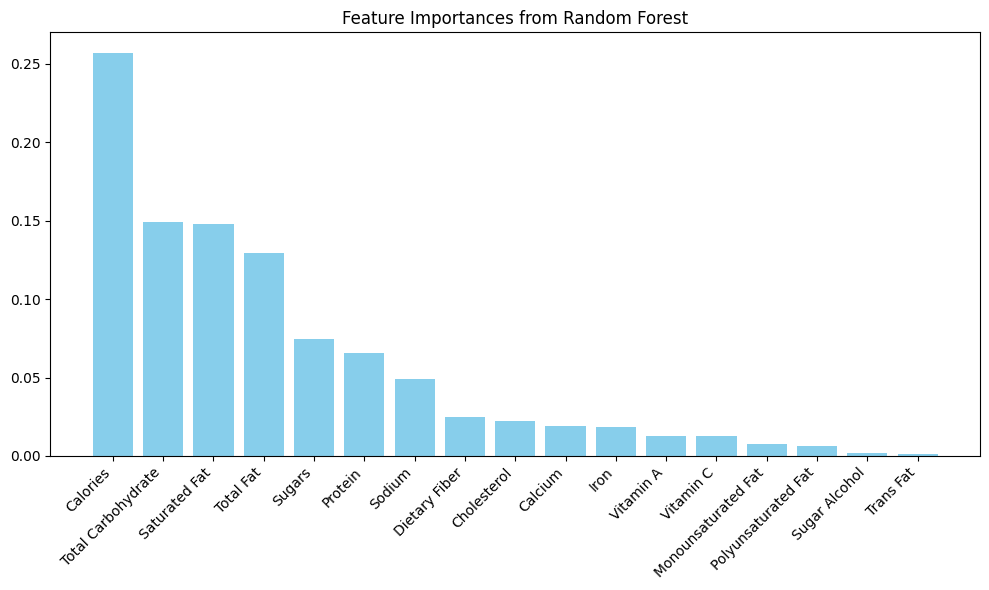

In [49]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Final Model Recommendation

Based on the evaluation metrics, the **Random Forest Classifier** is selected as the final model due to its high accuracy and ability to provide feature importances.

This model strikes a good balance between **performance** and **interpretability**, making it ideal for explaining decisions to stakeholders.